# Football Prediction Model

## 1. Defining the Question

### a) Specifying the Question

To develop a model that can predict the outcome of a game between team 1 and team 2 based on who is at home and who is away, as well as whether the game is friendly and the team's rankings.

### b) Defining the Metric for Success

The project will be considered a success if the models created are able to predict results of a game to an accuracy above 70%

### c) Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Brazil. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.

The ranking is currently sponsored by Coca-Cola; as such, The FIFA/Coca-Cola World Ranking name is also used. Coca-Cola also sponsors its women's counterpart.

### d) Recording the Experimental Design

We will use exploratory data analysis, such as Univariate, Bivariate, and Multivariate Analysis, in this study to determine the relationships and differences between different variables. We'll also use polynomial and logistic regression to develop models.

### e) Data Relevance

We'll shall use two datasets which can be found here https://bit.ly/3ryAJR7

Our datasets contain information on football rankings through time and are thus useful for building a model that will be used to forecast the outcome of a game between team 1 and team 2 based on who is at home and who is away, as well as whether the game is friendly while reviewing the team's rankings.

## 2. Reading the Data

In [589]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [505]:
# Let's read the fifa ranking data

fifa_ranking = pd.read_csv('fifa_ranking.csv')

results = pd.read_csv('results.csv')

## 3. Checking the Data

In [506]:
# Fifa ranking data top data

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [507]:
# Results data top data

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [508]:
# Checking the number of records in our dataset
#
print("The rows and columns for the fifa ranking dataset respectively: ", fifa_ranking.shape)
print("The rows and columns for the results dataset respectively: ", results.shape)

The rows and columns for the fifa ranking dataset respectively:  (57793, 16)
The rows and columns for the results dataset respectively:  (40839, 9)


## 4. External Data Source Validation

## 5. Tidying the Dataset

#### a). Checking for Null Values

In [509]:
# Fifa ranking data

total = fifa_ranking.isnull().sum().sort_values(ascending=False)
percentage = (fifa_ranking.isnull().sum()/fifa_ranking.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
rank,0,0.0
country_full,0,0.0
country_abrv,0,0.0
total_points,0,0.0
previous_points,0,0.0
rank_change,0,0.0
cur_year_avg,0,0.0
cur_year_avg_weighted,0,0.0
last_year_avg,0,0.0
last_year_avg_weighted,0,0.0


In [510]:
# Result data

total = results.isnull().sum().sort_values(ascending=False)
percentage = (results.isnull().sum()/results.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
date,0,0.0
home_team,0,0.0
away_team,0,0.0
home_score,0,0.0
away_score,0,0.0
tournament,0,0.0
city,0,0.0
country,0,0.0
neutral,0,0.0


There are no null values in the two datasets

#### b). Checking for Duplicates

In [511]:
# Fifa ranking data

fifa_ranking.duplicated().sum()

37

In [512]:
# Dropping the duplicated data

fifa_ranking.drop_duplicates(inplace=True,keep='first')

In [513]:
# Result data

results.duplicated().sum()

0

#### c). Checking the Datatypes

In [514]:
# Fifa ranking data

fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57756 non-null  int64  
 1   country_full             57756 non-null  object 
 2   country_abrv             57756 non-null  object 
 3   total_points             57756 non-null  float64
 4   previous_points          57756 non-null  int64  
 5   rank_change              57756 non-null  int64  
 6   cur_year_avg             57756 non-null  float64
 7   cur_year_avg_weighted    57756 non-null  float64
 8   last_year_avg            57756 non-null  float64
 9   last_year_avg_weighted   57756 non-null  float64
 10  two_year_ago_avg         57756 non-null  float64
 11  two_year_ago_weighted    57756 non-null  float64
 12  three_year_ago_avg       57756 non-null  float64
 13  three_year_ago_weighted  57756 non-null  float64
 14  confederation         

In [515]:
# Converting the rank_date column to datetime format

fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])

In [516]:
# Result data

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [517]:
# Converting the date column to datetime format

results.date = pd.to_datetime(results.date)

In [518]:
# Creating a new column for year in the Fifa ranking dataset

fifa_ranking['year'] = fifa_ranking['rank_date'].dt.year
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993


In [519]:
# Creating a new column for year in the results dataset

results['year'] = results['date'].dt.year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [520]:
# Creating the sum of the weighted points of the fifa ranking dataset

fifa_ranking['weighted_points'] =  fifa_ranking['cur_year_avg_weighted'] + fifa_ranking['two_year_ago_weighted'] + fifa_ranking['three_year_ago_weighted']
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,weighted_points
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,0.0
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,0.0
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,0.0
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,0.0
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,0.0


In [521]:
#Droppping irrelavant columns from the fifa_ranking data

fifa_ranking = fifa_ranking.drop(columns=['country_abrv', 'total_points','previous_points', 
                                 'rank_change', 'cur_year_avg','last_year_avg', 'last_year_avg_weighted',
                                 'two_year_ago_avg','three_year_ago_avg','confederation'])
fifa_ranking.head()

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,year,weighted_points
0,1,Germany,0.0,0.0,0.0,1993-08-08,1993,0.0
1,2,Italy,0.0,0.0,0.0,1993-08-08,1993,0.0
2,3,Switzerland,0.0,0.0,0.0,1993-08-08,1993,0.0
3,4,Sweden,0.0,0.0,0.0,1993-08-08,1993,0.0
4,5,Argentina,0.0,0.0,0.0,1993-08-08,1993,0.0


In [522]:
# Creating a new result column

results['result'] = results['home_score'] - results['away_score']

In [523]:
# Creating a function for Win, Draw and Loss

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [524]:
# Adding another column of Result to the results dataset

results['result']=results.result.apply(lambda x: result(x))

In [525]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,win


In [526]:
# Dropping irrelevant columns for results dataset

results = results.drop(columns=['date','city'])
results.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,result
0,Scotland,England,0,0,Friendly,Scotland,False,1872,draw
1,England,Scotland,4,2,Friendly,England,False,1873,win
2,Scotland,England,2,1,Friendly,Scotland,False,1874,win
3,England,Scotland,2,2,Friendly,England,False,1875,draw
4,Scotland,England,3,0,Friendly,Scotland,False,1876,win


In [527]:
# Merging the FIFA ranking and results datasets

football = results.merge(fifa_ranking, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
football = football.merge(fifa_ranking, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
football.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
football.head()

,home_team,away_team,home_score,away_score,tournament,neutral,result,rank_x,cur_year_avg_weighted_x,two_year_ago_weighted_x,three_year_ago_weighted_x,rank_date_x,weighted_points_x,rank_y,cur_year_avg_weighted_y,two_year_ago_weighted_y,three_year_ago_weighted_y,rank_date_y,weighted_points_y
0,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,74,0.0,0.0,0.0,1993-08-08,0.0
1,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-09-23,0.0
2,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,73,0.0,0.0,0.0,1993-10-22,0.0
3,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,75,0.0,0.0,0.0,1993-11-19,0.0
4,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-12-23,0.0


In [528]:
# Renaming our column names
football.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'weighted_points_x':'home_team_weighted_points',
                     'weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
football.head()

,home_team,away_team,home_score,away_score,tournament,neutral,result,home_team_rank,cur_year_avg_weighted_x,two_year_ago_weighted_x,three_year_ago_weighted_x,rank_date_x,home_team_weighted_points,away_team_rank,cur_year_avg_weighted_y,two_year_ago_weighted_y,three_year_ago_weighted_y,rank_date_y,away_team_weighted_points
0,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,74,0.0,0.0,0.0,1993-08-08,0.0
1,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-09-23,0.0
2,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,73,0.0,0.0,0.0,1993-10-22,0.0
3,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,75,0.0,0.0,0.0,1993-11-19,0.0
4,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-12-23,0.0


## 6. Exploratory Analysis

### a) Univariate

In [529]:
football.describe()

,home_score,away_score,home_team_rank,cur_year_avg_weighted_x,two_year_ago_weighted_x,three_year_ago_weighted_x,home_team_weighted_points,away_team_rank,cur_year_avg_weighted_y,two_year_ago_weighted_y,three_year_ago_weighted_y,away_team_weighted_points
count,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06,2.325985e+06
mean,1.609680e+00,1.067255e+00,7.590704e+01,8.470737e+01,2.409213e+01,1.609433e+01,1.248938e+02,7.900101e+01,8.062025e+01,2.315991e+01,1.546869e+01,1.192488e+02
std,1.626439e+00,1.244811e+00,5.103110e+01,1.657331e+02,4.879833e+01,3.233876e+01,2.382001e+02,5.216845e+01,1.590900e+02,4.734827e+01,3.139371e+01,2.293198e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,1.120000e+02,1.048500e+02,2.561000e+01,1.734000e+01,1.663600e+02,1.160000e+02,9.649000e+01,2.318000e+01,1.598000e+01,1.527500e+02
max,3.100000e+01,1.500000e+01,2.090000e+02,1.158660e+03,3.479100e+02,2.401500e+02,1.511500e+03,2.090000e+02,1.158660e+03,3.479100e+02,2.401500e+02,1.511500e+03


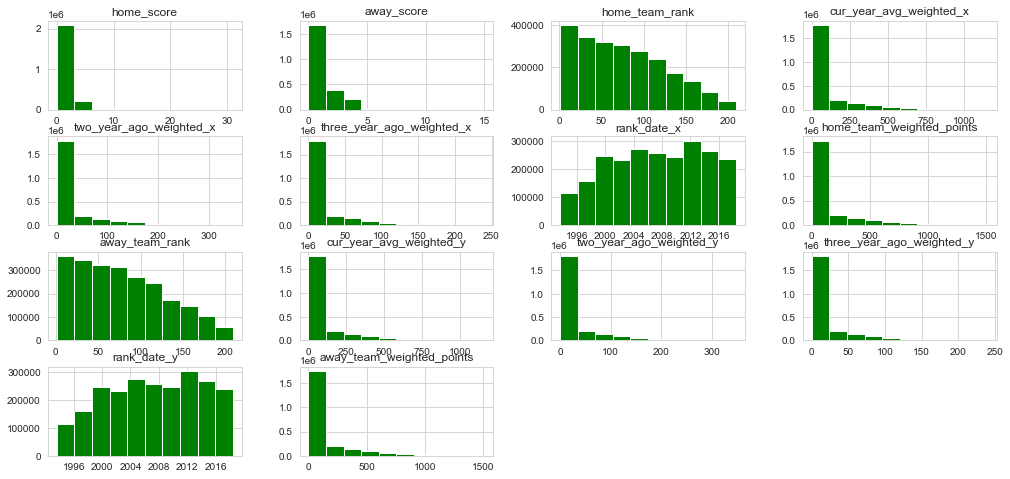

In [530]:
#Plots fo data distribution
football.hist(bins=10, figsize=[17,8], color = 'green')
plt.show()

From the above plots, we can clearly see that our data is not normally distributed

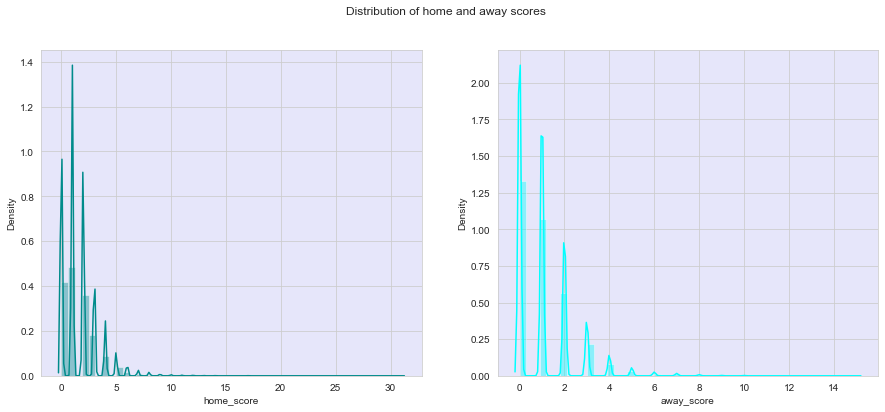

In [531]:
# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(), football, ['home_score', 'away_score'], ['darkcyan', 'aqua']):
  sns.distplot(football[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')

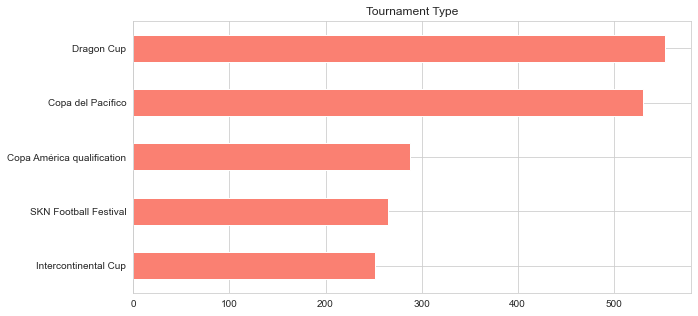

In [532]:
#Checking tournament type value counts
football.tournament.value_counts().sort_values().head(5).plot(kind = 'barh', figsize = (10,5), title = 'Tournament Type' , color = 'salmon')
plt.show()

We can clearly see that Dragon cup is the tournament with most participation

### b). Bivariate

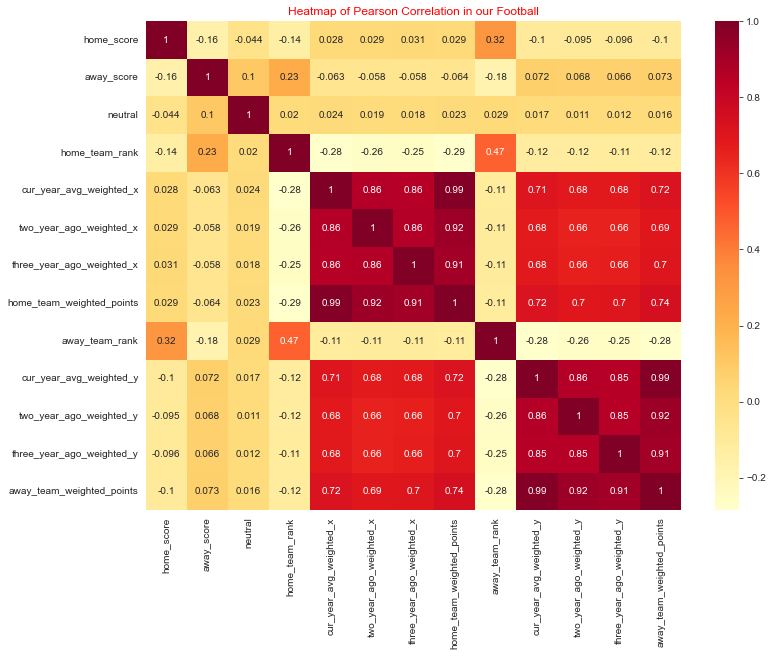

In [533]:
# Checking the Pearson's correlation
# Fifa ranking data

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(football.corr(),annot=True,cmap='YlOrRd')
plt.title('Heatmap of Pearson Correlation in our Football', color='red')
plt.show()

For teams, there is a strong negative correation between rank and weighted points

In [534]:
# Checking for Skewness

football[['home_team_rank','home_team_weighted_points']].skew()

home_team_rank               0.449956
home_team_weighted_points    2.151523
dtype: float64

Both Home_team_rank and home_team_weighted_points are positive skewed, this shows low existence of outliers

In [535]:
# Checking for Kurtosis

football[['home_team_rank','home_team_weighted_points']].kurt()

home_team_rank              -0.694995
home_team_weighted_points    4.367804
dtype: float64

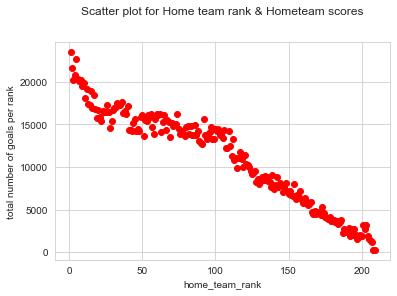

In [536]:
# Creating a scatter plot for total number of goals per rank
grp=football.groupby('home_team_rank')['home_score'].count().reset_index(name='total number of goals per rank')
plt.scatter(grp["home_team_rank"] , grp['total number of goals per rank'],color='red')
plt.title("Scatter plot for Home team rank & Hometeam scores", y=1.1)
plt.xlabel('home_team_rank')
plt.ylabel('total number of goals per rank')
plt.show()

The rank increases the number of home team scores reduces

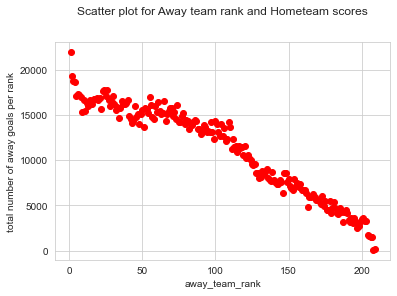

In [537]:
# Scatter plot for total number of goals per rank
grp=football.groupby('away_team_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.scatter(grp["away_team_rank"] , grp['total number of away goals per rank'],color='red')
plt.title("Scatter plot for Away team rank and Hometeam scores", y=1.1)
plt.xlabel('away_team_rank')
plt.ylabel('total number of away goals per rank')
plt.show()

The rank increases the number of away team scores reduces

## 7. Modelling

### a). Feature Engineering

In [538]:
# Creating a feature with status (Win,lose,Draw)
# Then creating a list to display the outcomes of the match

outcome  = [
              
    (football['home_score'] == football['away_score']),         
    (football['home_score'] < football['away_score']),
    (football['home_score'] > football['away_score'])

    ]

# the status we want to assign the outcomes
status = ['Draw','Lose','Win']

# Creating a new column and use np.select to assign values to it using our lists 
football['status'] = np.select(outcome, status)
football.head()

,home_team,away_team,home_score,away_score,tournament,neutral,result,home_team_rank,cur_year_avg_weighted_x,two_year_ago_weighted_x,three_year_ago_weighted_x,rank_date_x,home_team_weighted_points,away_team_rank,cur_year_avg_weighted_y,two_year_ago_weighted_y,three_year_ago_weighted_y,rank_date_y,away_team_weighted_points,status
0,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,74,0.0,0.0,0.0,1993-08-08,0.0,Draw
1,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-09-23,0.0,Draw
2,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,73,0.0,0.0,0.0,1993-10-22,0.0,Draw
3,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,75,0.0,0.0,0.0,1993-11-19,0.0,Draw
4,Ghana,Mali,1,1,Friendly,True,draw,48,0.0,0.0,0.0,1993-08-08,0.0,70,0.0,0.0,0.0,1993-12-23,0.0,Draw


In [539]:
# Creating tournament feature to show if the game was friendly or not
def tournament(f):
    if f == 'Friendly':
        return 'Friendly'
    else:
        return 'Not Friendly'
      
football['tournament'] = football.tournament.apply(lambda i: tournament(i))

In [540]:
# Converting Categorical features to numerical using Label encoding 

en = LabelEncoder()
football['neutral']= en.fit_transform(football['neutral'])
football['status']= en.fit_transform(football['status'])
football['tournament1']= en.fit_transform(football['tournament'])

#### b). Checking for multicollinearity

In [541]:
# Checking the correlations between the variables
#
corrs = football[['home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral','home_team_weighted_points','away_team_rank','away_team_weighted_points',
       'status']].corr()
corrs

,home_score,away_score,neutral,home_team_weighted_points,away_team_rank,away_team_weighted_points,status
home_score,1.000000,-0.164660,-0.044394,0.029222,0.321172,-0.102093,0.517870
away_score,-0.164660,1.000000,0.101418,-0.063538,-0.178289,0.072876,-0.242645
neutral,-0.044394,0.101418,1.000000,0.022842,0.029386,0.015896,-0.046183
home_team_weighted_points,0.029222,-0.063538,0.022842,1.000000,-0.114649,0.740220,0.033733
away_team_rank,0.321172,-0.178289,0.029386,-0.114649,1.000000,-0.282790,0.216727
away_team_weighted_points,-0.102093,0.072876,0.015896,0.740220,-0.282790,1.000000,-0.071106
status,0.517870,-0.242645,-0.046183,0.033733,0.216727,-0.071106,1.000000


In [542]:
# Checking using VIF (Variance Inflation Factor)

vif = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif

,home_score,away_score,neutral,home_team_weighted_points,away_team_rank,away_team_weighted_points,status
home_score,1.469067,-0.000517,0.044417,-0.147603,-0.308310,0.123154,-0.678305
away_score,-0.000517,1.114478,-0.108756,0.224631,0.125685,-0.194847,0.216996
neutral,0.044417,-0.108756,1.016632,-0.052121,-0.068088,0.016712,0.015263
home_team_weighted_points,-0.147603,0.224631,-0.052121,2.345194,-0.143730,-1.810640,-0.048169
away_team_rank,-0.308310,0.125685,-0.068088,-0.143730,1.233578,0.412399,-0.046161
away_team_weighted_points,0.123154,-0.194847,0.016712,-1.810640,0.412399,2.486117,0.038192
status,-0.678305,0.216996,0.015263,-0.048169,-0.046161,0.038192,1.418976


The VIF score for each variable is found next to the sloping diagonal. Like the home_score is around 1.46

Since all of these ratings are less than 5, there is no multicollinearity.

### i). Polynomial Model

##### a). Home Score

In [543]:
# Selecting the target and feature

dataset = football[['home_score', 'away_score','neutral','home_team_weighted_points','away_team_rank','away_team_weighted_points',
       'status']]

X= dataset.drop('home_score', axis=1).values
y=dataset["home_score"].values

In [544]:
# Splitting the dataset into train and test sets

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [545]:
# Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [546]:
# Fitting polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 1) 
X_poly = poly_reg.fit_transform(X)


In [547]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [548]:
# Predict using Polynomial Regression

y_pred = regressor.predict(X_test)

In [549]:
# Assesing the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9652909913402103
Mean Squared Error: 1.8200374740041472
Root Mean Squared Error: 1.3490876450416953


Performing Heteroskedasticity for the model

In [550]:
# We now create the residual by substracting the test value from the 
# predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.0012597561398575664

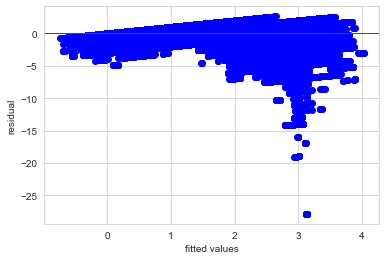

In [551]:
# Plotting the residuals

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [552]:
#Performing Bartlett's Test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

inf
The variances are homogeneous!


##### b). Away Score

In [553]:
X= dataset.drop('away_score', axis=1).values
y=dataset["away_score"].values

In [554]:
# Splitting the dataset into train and test sets

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [555]:
# Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [556]:
# Fitting polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 1) 
X_poly = poly_reg.fit_transform(X)

In [557]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [558]:
# Predict using Polynomial Regression

y_pred = regressor.predict(X_test)

In [559]:
# Assesing the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8668729168151582
Mean Squared Error: 1.3852768363468866
Root Mean Squared Error: 1.176977840210633


Performing Heteroskedasticity for the model

In [560]:
# We now create the residual by substracting the test value from the 
# predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.001480918641736129

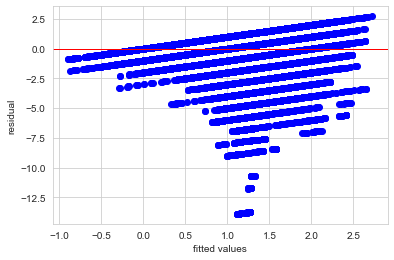

In [561]:
# Plotting the residuals

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [562]:
#Performing Bartlett's Test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

inf
The variances are homogeneous!


### ii). Logistic Regression 

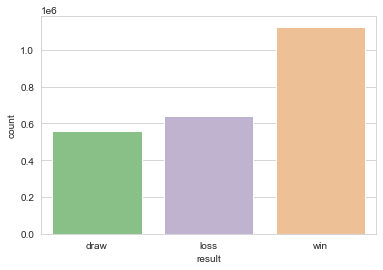

In [567]:
# Checking that our target variable is binary
sns.countplot(x='result',data=football, palette='Accent')
plt.show()

In [573]:
#Encoding the results column to numeric

football['result'] = LabelEncoder().fit_transform(football['result'])

In [574]:
football.head()

,home_team,away_team,home_score,away_score,tournament,neutral,result,home_team_rank,cur_year_avg_weighted_x,two_year_ago_weighted_x,...,rank_date_x,home_team_weighted_points,away_team_rank,cur_year_avg_weighted_y,two_year_ago_weighted_y,three_year_ago_weighted_y,rank_date_y,away_team_weighted_points,status,tournament1
0,Ghana,Mali,1,1,Friendly,1,0,48,0.0,0.0,...,1993-08-08,0.0,74,0.0,0.0,0.0,1993-08-08,0.0,0,0
1,Ghana,Mali,1,1,Friendly,1,0,48,0.0,0.0,...,1993-08-08,0.0,70,0.0,0.0,0.0,1993-09-23,0.0,0,0
2,Ghana,Mali,1,1,Friendly,1,0,48,0.0,0.0,...,1993-08-08,0.0,73,0.0,0.0,0.0,1993-10-22,0.0,0,0
3,Ghana,Mali,1,1,Friendly,1,0,48,0.0,0.0,...,1993-08-08,0.0,75,0.0,0.0,0.0,1993-11-19,0.0,0,0
4,Ghana,Mali,1,1,Friendly,1,0,48,0.0,0.0,...,1993-08-08,0.0,70,0.0,0.0,0.0,1993-12-23,0.0,0,0


In [583]:
# Setting the X and y variables

X =football.drop(columns= ['home_team', 'away_team', 'tournament',
       'neutral', 'result', 'cur_year_avg_weighted_x',
       'two_year_ago_weighted_x', 'three_year_ago_weighted_x', 'rank_date_x',
       'cur_year_avg_weighted_y', 'two_year_ago_weighted_y',
       'three_year_ago_weighted_y', 'rank_date_y',
       'status', 'tournament1'])
y =football['result']

In [584]:
#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [585]:
# Fitting the model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [586]:
# Making predictions

y_pred = LogReg.predict(X_test)

In [588]:
# Evaluating our model
#
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[167094,      0,      0],
       [     0, 192375,      0],
       [     0,      0, 338327]], dtype=int64)

In [590]:
# Accuracy

print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 1.0


## 8. Challenging the solution

#### a). Cross Validation 

In [404]:
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.4545665392922308

Training model 2
Model 2 Root Mean Squared Error: 0.21275566191406536

Training model 3
Model 3 Root Mean Squared Error: 1.7750698964709062

Training model 4
Model 4 Root Mean Squared Error: 0.1672031953741037

Training model 5
Model 5 Root Mean Squared Error: 1.1242036429767812


#### b). Heteroscedasticity of the plots using Bartlett’s test

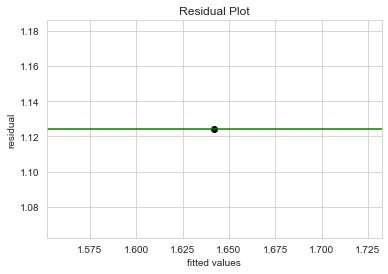

In [406]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

## 9. Follow up questions

### a). Did we have the right data?

No, we didn't. To create accurate projections, we need additional data.

### b). Do we need other data to answer our question?

Definately, to be able to make better forecasts, we need more features.

### c). Did we have the right question?

Yes. Predicting a match's outcome based on previous scores was able to give us a good analysis.

## 11. Conclusion and Recommendation

Because polynomial and logistic regression aren't the optimal regression methods for this type of dataset, different modeling techniques should be used in order to predict FIFA results better.